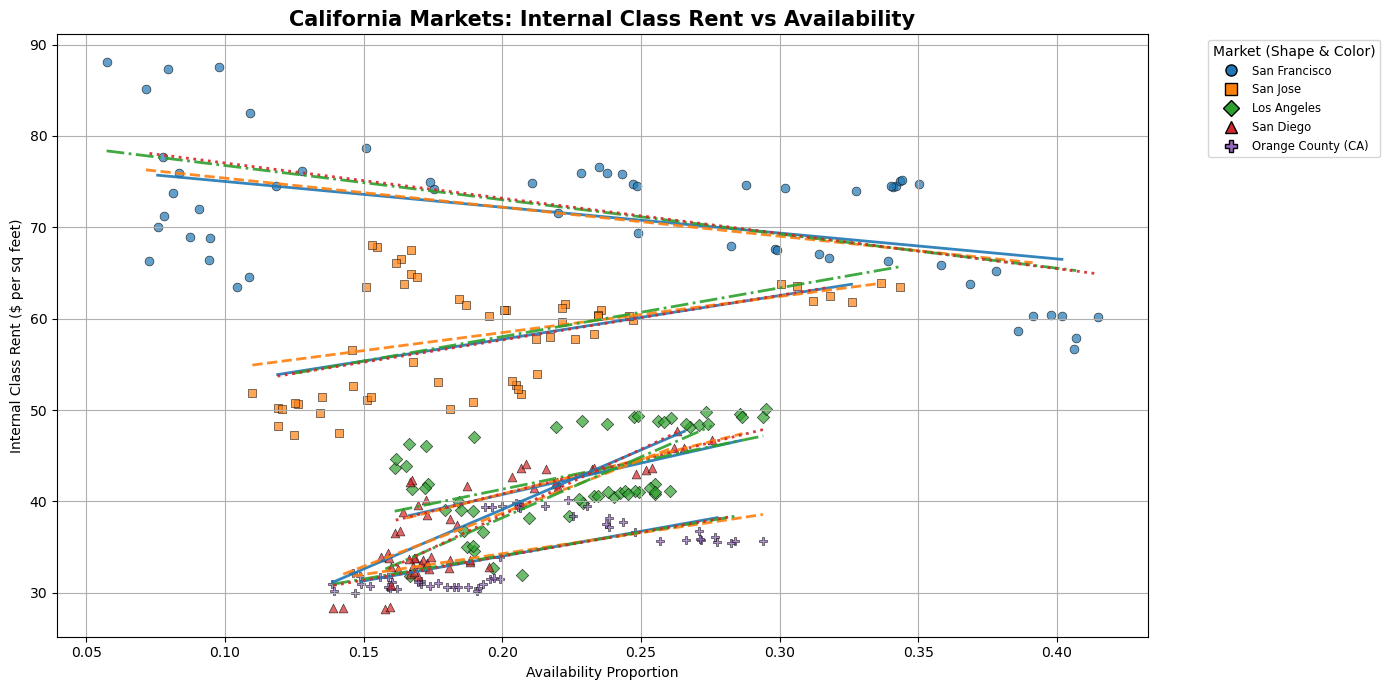

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Load and clean data
california_df = pd.read_csv('Price and Availability Data.csv')
california_df['market'] = california_df['market'].replace({'South Bay': 'San Jose'})

# Define quarter style (for line color only)
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
line_styles = ['-', '--', '-.', ':']
quarter_colors = dict(zip(quarters, sns.color_palette("tab10", 4)))

# Market-specific colors & shapes (used in BOTH legend & scatter)
market_markers = {
    'San Francisco': 'o',
    'San Jose': 's',
    'Los Angeles': 'D',
    'San Diego': '^',
    'Orange County (CA)': 'P'
}
market_colors = {
    'San Francisco': 'tab:blue',
    'San Jose': 'tab:orange',
    'Los Angeles': 'tab:green',
    'San Diego': 'tab:red',
    'Orange County (CA)': 'tab:purple'
}

# Filter to selected markets
california_markets = list(market_markers.keys())
california_df = california_df[california_df['market'].isin(california_markets)]

# Start plot
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plot trendlines and scatter with MARKET-based color/shape
for market in california_df['market'].unique():
    for quarter in quarters:
        subset = california_df[(california_df['market'] == market) & (california_df['quarter'] == quarter)]
        if not subset.empty:
            # Quarter-colored trendline
            sns.regplot(
                data=subset,
                x='availability_proportion',
                y='internal_class_rent',
                scatter=False,
                ci=None,
                ax=ax,
                line_kws={
                    'linestyle': line_styles[quarters.index(quarter)],
                    'linewidth': 2,
                    'color': quarter_colors[quarter],
                    'alpha': 0.9,
                }
            )
            # Market-colored scatter points
            ax.scatter(
                subset['availability_proportion'],
                subset['internal_class_rent'],
                s=40,
                c=market_colors[market],
                marker=market_markers[market],
                edgecolors='black',
                linewidths=0.5,
                alpha=0.7
            )

# Create custom legend matching market shape + color
legend_elements = [
    Line2D([0], [0],
           marker=market_markers[market],
           color='w',
           markerfacecolor=market_colors[market],
           markeredgecolor='black',
           markersize=8,
           linestyle='None',
           label=market)
    for market in california_markets
]

# Final labels and layout
plt.title('California Markets: Internal Class Rent vs Availability', fontsize=15, weight='bold')
plt.xlabel('Availability Proportion')
plt.ylabel('Internal Class Rent ($ per sq feet)')
plt.grid(True)
plt.legend(
    handles=legend_elements,
    title='Market (Shape & Color)',
    fontsize='small',
    title_fontsize='medium',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()
